# Test differentation

Set up simple loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from geometry import *

In [3]:
def error_differential_eucl(u, v, geometry="hyperbolic"):
    '''
        Calculate differential of distance between points u and v, accounting for different
        geometries by implementing an appropriate metric.
        Inputs:
            u: (d+1)-dimensional vector, expressed in ambient space coordinates
            v: (d+1)-dimensional vector, expressed in ambient space coordinates
            geometry: specifies which metric to use (and hence how inner product calculated)
        Outputs:
            gradient of the distance in (d+1)-dimensional ambient space coordinates
    '''
    # If u and v are identical, the gradient should be zero
    if np.array_equal(u, v):
        return np.zeros(u.shape)
    # If u and v are different, calculate the gradient
    metric = np.ones([u.shape[0], u.shape[0]])
    if geometry == "hyperbolic":
        metric[-1, -1] *= -1.
    coeff = -1./np.sqrt(1.-dot(u,v, geometry)) #Undefined if u and v co-incide
    return coeff*2*u*v.dot(metric)

In [4]:
theta = np.linspace(-0.323*np.pi, 0.323*np.pi, 1000)
x0 = np.sinh(theta)
x1 = np.cosh(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])

In [5]:
target = np.array([0., 1.])
initial_point = np.array([np.sinh(0.9), np.cosh(0.9)])

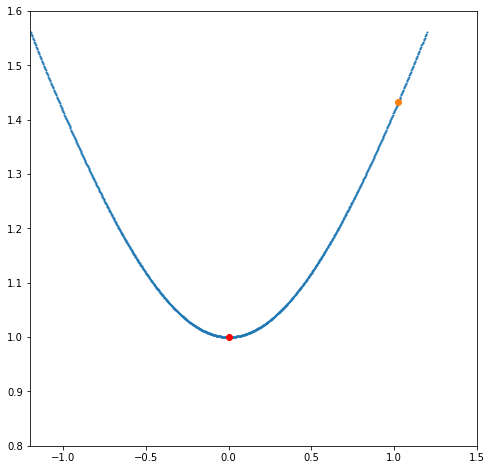

In [6]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.5], ylim=[0.8, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r')
ax.scatter(initial_point[0], initial_point[1])

In [7]:
first_step = -1.*error_differential_eucl(initial_point, target, geometry="hyperbolic")

In [8]:
projection = project_to_tangent(initial_point, first_step, geometry="hyperbolic")
second_point = exponential_map(projection, initial_point, geometry="hyperbolic")
print(second_point)

norm_v_tan =  3.7724164258565525
[53.47326586 53.48261551]


In [9]:
def gradient_descent(pt_i, target, differential_fn, geometry="hyperbolic", learning_rate=1.):
    '''
        Calculate local gradient of differential, given the current pt and the target.
        Inputs:
                Two (d+1)-dimensional vectors in ambient space co-ordinates, pt_i and target
                pt_i: (d+1)-dimensional vector in ambient space co-ordinates,
                       the point to evaluate the gradient at.
                target: (d+1)-dimensional vectors in ambient space co-ordinates, the target point
                differential_fn: function that calculates the derivative
                learning_rate: dictates how far to step in gradient direction
    '''
    # Calculate gradient in ambient space co-ordinates
    step = -learning_rate*differential_fn(pt_i, target, geometry)
    # Project this gradient onto tangent space
    projection = project_to_tangent(pt_i, step, geometry)
    # Map to manifold and return this updated pt
    return exponential_map(projection, pt_i, geometry)

In [11]:
updated_pts = [initial_point]
for i in range(1,8):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         target, 
                         error_differential_eucl, 
                         geometry="hyperbolic", 
                         learning_rate=0.3
                        )

    )

norm_v_tan =  1.131724927756966
norm_v_tan =  7.898666371575976
norm_v_tan =  1249356.377993085
norm_v_tan =  nan
norm_v_tan =  nan
norm_v_tan =  nan
norm_v_tan =  nan


/Users/david/Work/ASOS/GeometryTests/geometry.py:38: RuntimeWarning: overflow encountered in cosh
  return np.cosh(norm_v_tan)*point_on_manifold + (np.sinh(norm_v_tan)/norm_v_tan)*v_tan
/Users/david/Work/ASOS/GeometryTests/geometry.py:38: RuntimeWarning: overflow encountered in sinh
  return np.cosh(norm_v_tan)*point_on_manifold + (np.sinh(norm_v_tan)/norm_v_tan)*v_tan
/Users/david/Work/ASOS/GeometryTests/geometry.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return u[:-1].dot(v[:-1])-u[-1]*v[-1]


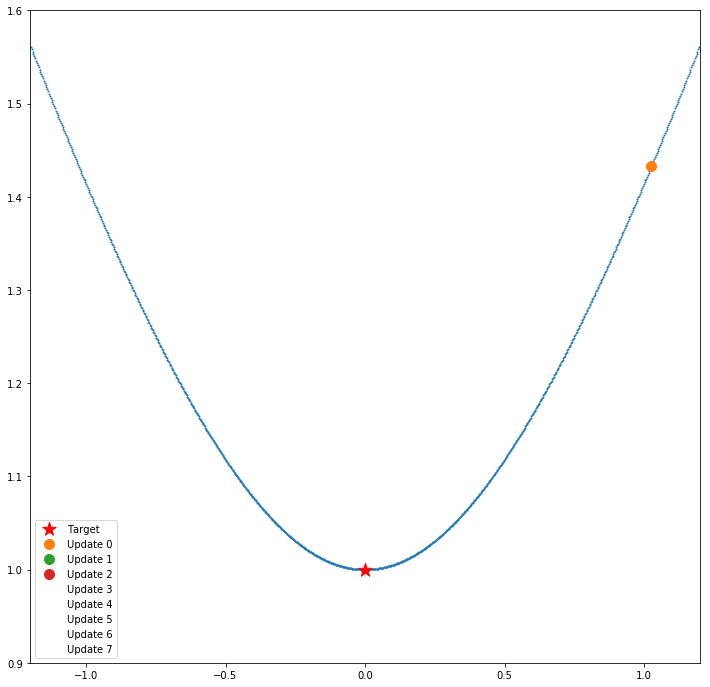

In [12]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0.9, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(pt[0], pt[1], marker=markers.MarkerStyle('o',fillstyle="none"), s=100, label="Update {}".format(i))
ax.legend()